#FINAL REPORT

Course: Applied Parallel Programming  
21120449 - Nguyễn Văn Hậu  
21120464 - Nguyễn Quốc Hưng  
[GitHub](https://github.com/NguyenQuocHung47/APP)

# Image Sharpening

## I. Mô tả

### 1. Tổng quan
Trong xử lý ảnh, image sharpening giúp làm nổi bật chi tiết, cải thiện độ rõ nét của các đối tượng và biên trong ảnh. Tuy nhiên, các phương pháp làm sắc nét truyền thống như **Unsharp Masking** có thể gây ra hiệu ứng **halo**, làm xuất hiện các viền sáng/tối không tự nhiên quanh biên ảnh. Để khắc phục vấn đề này, chúng ta cần áp dụng các kỹ thuật phức tạp hơn bảo toàn chi tiết mà không gây nhiễu.  
Đâu vào : Ảnh định dạng jpg  
Đầu ra : Ảnh được tăng cường độ sắc nét

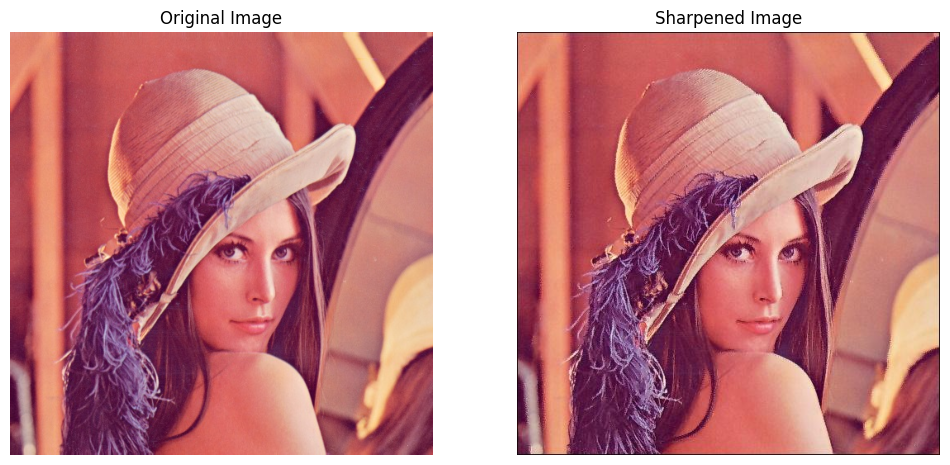

## 2. Chi tiết  
Phương pháp: sử dụng kết hợp Gaussian Blur và [High-Frequency Detail-Preserving Contrast Enhancement](https://www.semanticscholar.org/reader/3b7a0d22d805d3671b8412aaf62d955d44d02c5b)    
**High-Frequency Detail-Preserving Contrast Enhancement** được tham khảo từ bài nghiên cứu [An Efficient and Self-Adapted Approach to
the Sharpening of Color Images](https://www.semanticscholar.org/reader/3b7a0d22d805d3671b8412aaf62d955d44d02c5b)- Lih-Jen Kau,Tien-Lin Lee, được xuất bản trên tạp chí The Scientific World Journal năm 2013, đề xuất một phương pháp làm sắc nét ảnh màu hiệu quả và tự thích ứng. Phương pháp này tập trung vào việc tăng cường độ sắc nét của ảnh màu trong khi vẫn bảo toàn các chi tiết quan trọng và không gây ra hiệu ứng halo, chỉ sử dụng kênh Value để làm sắc nét ảnh.  

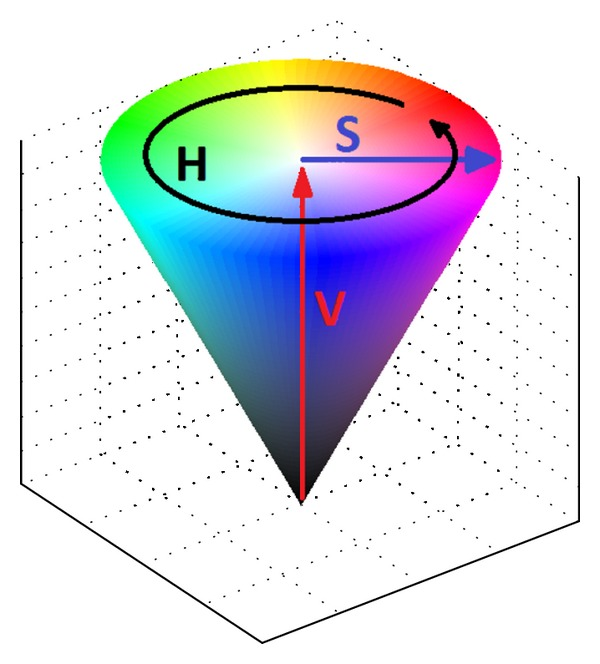  





### Các bước thực hiện

- Chuyển đổi RGB -> HSV
- Gaussian Blur
- Edge Detection cho kênh Value
- Low-pass Filtering
- Tính toán additive magnitude  
- Edge sharpen  
- Chuyển đổi HSV -> RGB

### Phân tích thuật toán
**1. Chuyển đổi RGB -> HSV**   
Ban đầu, hình ảnh  được biểu diễn bằng định dạng màu RGB. Do đó phải chuyển đổi sang không gian màu HSV để thực hiện quá trình làm sắc nét hình ảnh.  
Trước khi chuyển đổi, 3 thành phần RGB sẽ được chuẩn hóa về [0,1].  
Mỗi pixel của ảnh RGB được chuyển sang không gian màu HSV bằng công thức:  
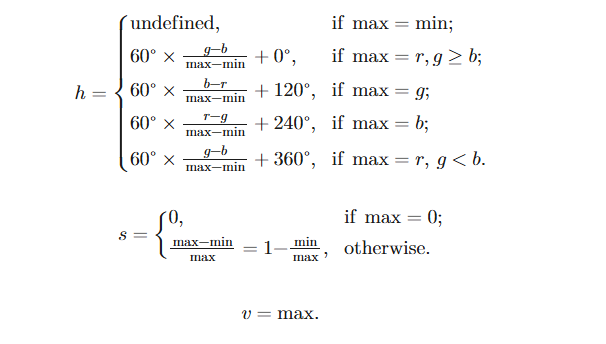


**2. Gaussian Blur**  
Giảm nhiễu trong ảnh trước khi thực hiện phát hiện biên.  
Làm mượt các vùng có biến đổi nhẹ để tránh phát hiện sai biên do nhiễu.  
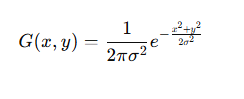

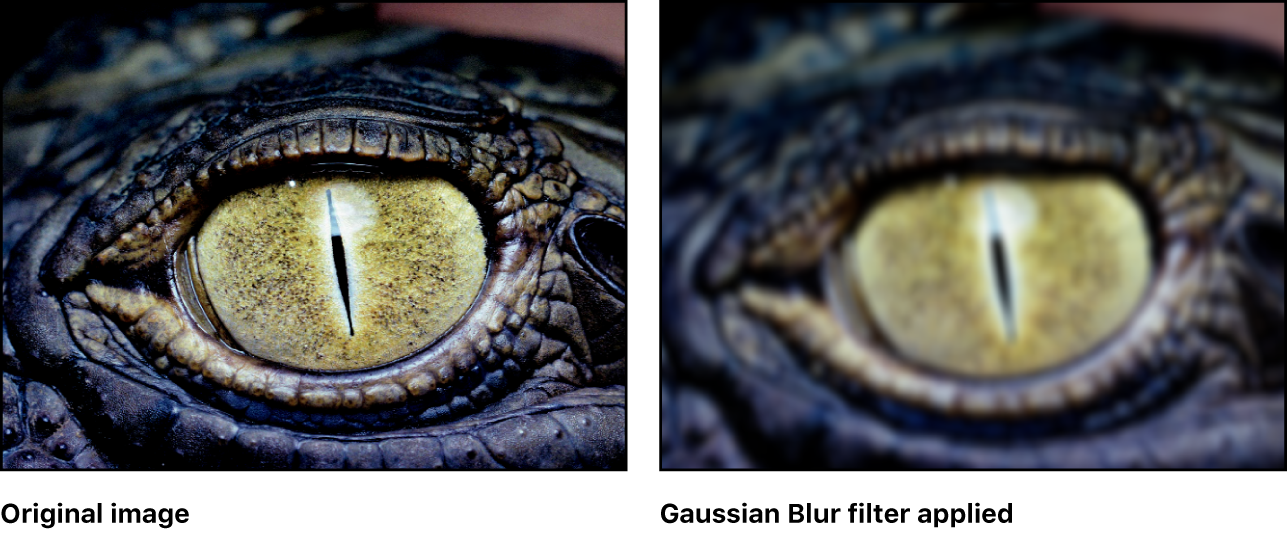

**3. Edge Detection**  
Xác định các khu vực có sự thay đổi mạnh về cường độ sáng (biên của vật thể).  
Sử dụng trên kênh V (Value) trong không gian màu HSV.  

chúng ta xác định xem mỗi pixel có phải là cạnh hay không bằng cách kiểm tra các lân cận trên và trái. Nếu một trong 2 lân cận của nó có sự khác biệt vượt quá ngưỡng nhất định, pixel này là biên.  
Giá trị **eth** được đề nghị là [8,18] -> [0.08,0.18]  
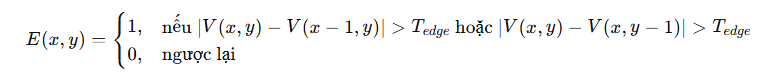



Đầu vào là một hình ảnh HSV và đầu ra là một hình ảnh biên 0-1 chỉ có 1 giá trị. Giá trị 1 trong đầu ra cho biết pixel là một biên.

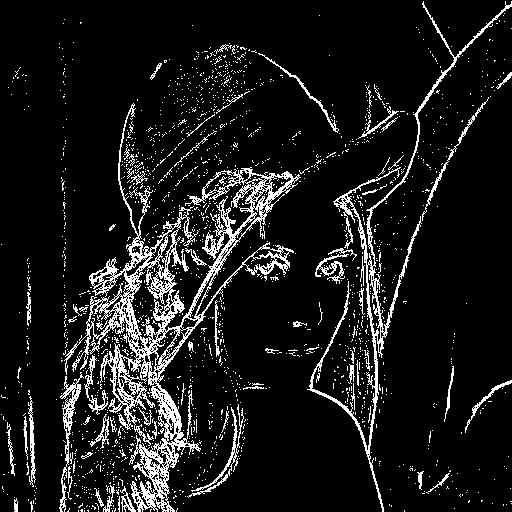

*Kết quả trả về với **eth** = 0.07*

**4. Low-pass filtering**  
Tiếp tục làm việc trên ảnh cạnh từ giai đoạn trước và sử dụng **Low-pass filtering** lọc ra các pixel cạnh bị cô lập. Đối với mỗi pixel đã được đánh dấu là cạnh, đếm số lượng 8 lân cận. Nếu số đếm nhỏ hơn ngưỡng nhất định, pixel này sẽ được đánh dấu là không phải cạnh.  
Giá trị threshold nằm trong khoảng [0;8]  
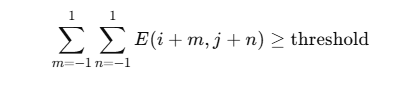


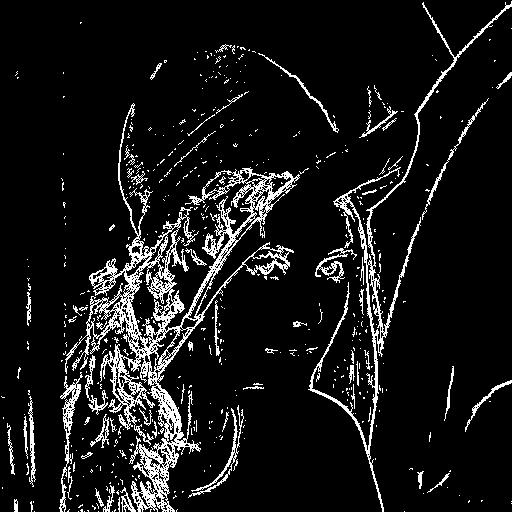  
*Kết quả sau khi sử dụng LPF với **threshold**=2*

**5. Tính toán độ lớn cộng gộp (?) - additive magnitude**  
Xác định độ lớn cộng gộp tối đa - maximum additive magnitude. Tính bằng giá trị tối đa, tối thiểu và trung bình trên toàn bộ hình ảnh HSV.  
Trong quá trình làm sắc nét ảnh sử dụng kênh Value, để tăng kết quả làm sắc nét, ta sử dụng 1 độ lớn cộng gộp để điều chỉnh giá trị pixel trên biên. Tuy nhiên, điều này có thể dẫn đến sự bão hòa cường độ - saturation of intensity ( khi V tăng vượt quá giới hạn tối đa (1.0), tức là nó sẽ đạt độ sáng tối đa có thể, mất chi tiết và có thể tạo ra hiện tượng "cháy sáng" (overexposure) trong ảnh). 
Với mục tiêu độ lớn cộng gộp phù hợp với từng ảnh cụ thể (Sefl-Adapted), tác giả sử dụng thống kê toàn cục (global statistics) của kênh V để tính delta.  
Dựa trên thực nghiệm, tác giả nhận thấy rằng:
-   Một mức tăng/giảm khoảng Max/8 tại các vùng biên là đủ để tạo ra sự khác biệt nhận thấy được bằng mắt người.

-   Với ảnh có độ sáng cao, cần một độ tăng cường nhỉnh hơn Max/8 để làm sắc nét rõ ràng.

-   Ngược lại, ảnh tối chỉ cần ít hơn Max/8 là đủ.

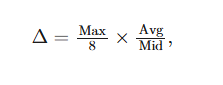

**6. Làm sắc nét dựa trên biên**  

Ở bước này, cường độ của các điểm ảnh nằm xung quanh vùng biên được điều chỉnh thông qua một giá trị tăng hoặc giảm nhằm làm nổi bật biên ảnh (edge). Trong khi đó, các điểm ảnh không thuộc vùng biên sẽ giữ nguyên giá trị, nhằm tránh gây nhiễu và đảm bảo các chi tiết ảnh cho các vùng khác của ảnh.

Để làm nổi bật cả những biên có độ chênh lệch nhỏ mà không gây ra hiện tượng làm sắc nét quá mức (oversharpening), giá trị điều chỉnh $\delta_x$ cần được điều chỉnh linh hoạt dựa trên thống kê cục bộ của ảnh thay vì chỉ dựa vào thống kê toàn cục  


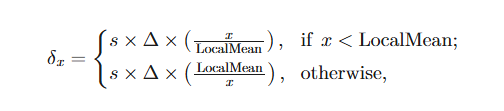


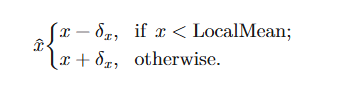

**7. Chuyển đổi HSV -> RGB**


## II. Câu hỏi hàng tuần

####  Tuần 1

**Q1:** Tại sao khi chuyển đổi RGB -> HSV, h = underfined nếu max = min?

**Answer:** Khi chuyển đổi RGB -> HSV, nếu ba thành phần R, G và B tại một điểm ảnh bằng nhau, ta có max = min. 
Khi đó, ảnh tại điểm đó là màu xám trung tính và không biểu hiện một tông màu cụ thể nào. 
Điều này làm cho thành phần H trở nên không xác định về mặt toán học, do công thức tính H có chứa phép chia cho (max - min), vốn sẽ bằng 0 trong trường hợp này -> H tại những điểm ảnh có màu xám = undefined

**Q2:** Kế hoạch của nhóm sẽ song song hóa nó nhanh gấp bao nhiêu lần so với cài đặt tuần tự?

**Answer:** Tối thiểu 5x

**Q3:** Sự khác biệt giữa Image Sharpening và Image Smoothing là gì?

**Answer:** 
Image Smoothing (làm mịn ảnh) dùng với mục đích giảm nhiễu ảnh và làm cho hình ảnh "mượt" hơn. Trong điều kiện ánh sáng yếu hoặc môi trường không ổn định, hình ảnh có thể xuất hiện nhiều nhiễu (noise). Việc làm mịn giúp làm mờ các chi tiết nhỏ hoặc các vùng nhiễu bằng cách tính toán trung bình hoặc trung vị giá trị các điểm ảnh lân cận. Các thuật toán thường được sử dụng cho smoothing bao gồm Gaussian Blur, Median Filter và Bilateral Filter. 

Image Sharpening (làm sắc nét ảnh) là tăng cường chi tiết, đặc biệt là các đường biên và cạnh trong ảnh. Khi một ảnh bị mờ hoặc thiếu độ tương phản, kỹ thuật sharpen sẽ giúp làm nổi bật các chuyển tiếp mạnh mẽ giữa các vùng sáng – tối, từ đó giúp ảnh trở nên rõ ràng và sắc nét hơn. Việc làm sắc thường dựa trên các toán tử tính để khuếch đại các thành phần tần số cao trong ảnh. 

**Q4:** Dự án có tích hợp kỹ thuật làm sắc nét này vào một ứng dụng thực tế nào không, ví dụ như phần mềm chỉnh sửa ảnh

**Answer:** Hiện tại nhóm mình chỉ thực hiện hoàn toàn trên Notebook. Trong tương lai, nếu có thời gian, nhóm mình sẽ cân nhắc việc phát triển tiếp một trang web với chức năng tương tự.

## III. Phiên bản tuần tự 

### 0. Import thư viện, biến toàn cục

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import math
input_path = 'Lena.jpg'
output_path = 'sharpened_image.jpg'


### 1. Hàm chuyển RGB2HSV

In [62]:
def rgb_to_hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc


    if minc == maxc:
        return 0.0, 0.0, v
    
    s = (maxc - minc) / maxc
    rc = (maxc - r) / (maxc - minc)
    gc = (maxc - g) / (maxc - minc)
    bc = (maxc - b) / (maxc - minc)

    if r == maxc:
        h = bc - gc
    elif g == maxc:
        h = 2.0 + rc - bc
    else:
        h = 4.0 + gc - rc
    h = (h / 6.0) % 1.0
    return h, s, v

Kết quả kênh V dùng để làm sắc nét 

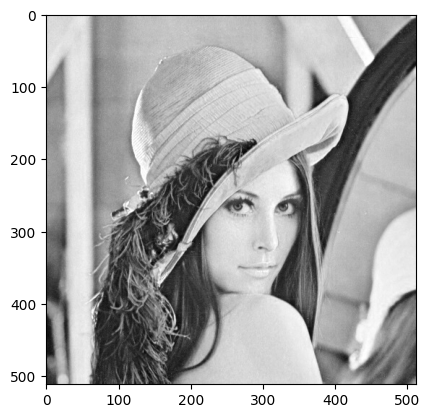

In [63]:
def take_v_channel_image(hsv_image, output_path):
    height = len(hsv_image)
    width = len(hsv_image[0])
    v_image = Image.new('L', (width, height))  # 'L' mode = grayscale

    for i in range(height):
        for j in range(width):
            v = hsv_image[i][j][2]  # Lấy giá trị V (0.0 - 1.0)
            gray_value = int(v * 255)  # Chuyển về 0 - 255
            v_image.putpixel((j, i), gray_value)

    v_image.save(output_path)

input_image = Image.open('Lena.jpg')
width, height = input_image.size
rgb_image = input_image.convert('RGB')

hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
for i in range(height):
        for j in range(width):
            r, g, b = rgb_image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r , g , b )
            hsv_image[i][j] = [h, s, v]
take_v_channel_image(hsv_image, 'v_channel_image.png')

v_image = Image.open('v_channel_image.png')

plt.imshow(v_image,cmap='gray')

### 2. Hàm chuyển HSV2RGB

In [64]:
def hsv_to_rgb(h, s, v):
    if s == 0.0:
        return v, v, v
    i = int(h * 6.0)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))
    i = i % 6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q

### 3. Hàm phát hiện biên 

In [65]:
def detect_edges(value_channel, threshold):
    height = len(value_channel)
    width = len(value_channel[0])
    edges = [[0] * width for _ in range(height)]
    for i in range(1, height):
        for j in range(1, width):
            if (abs(value_channel[i][j] - value_channel[i - 1][j]) > threshold or
                abs(value_channel[i][j] - value_channel[i][j - 1]) > threshold):
                edges[i][j] = 1
    return edges

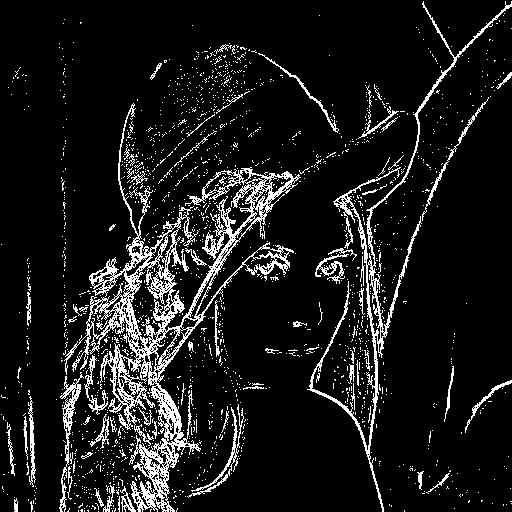  
*Kết quả khi không sử dụng Gaussian Blur*

### 4. Hàm LPF

In [66]:
def low_pass_filter(edges, neighbor_threshold):
    height = len(edges)
    width = len(edges[0])
    filtered_edges = [[edges[i][j] for j in range(width)] for i in range(height)]
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if edges[i][j] == 1:
                neighbor_count = sum([edges[i + di][j + dj] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) - 1
                if neighbor_count < neighbor_threshold:
                    filtered_edges[i][j] = 0
    return filtered_edges


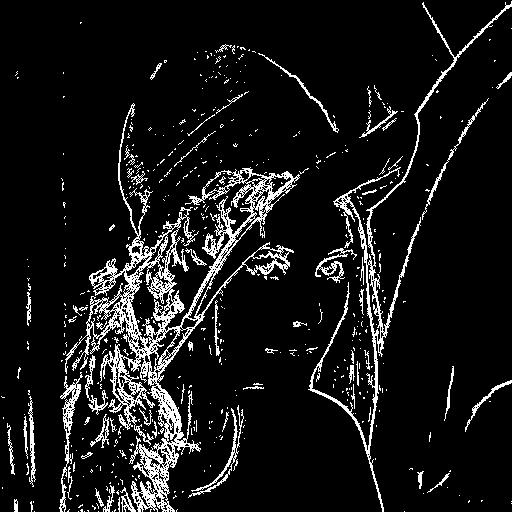  
*Kết quả khi không sử dụng Gaussian Blur*

### 5. Hàm tính additive magnitude

In [67]:
def calculate_additive_magnitude(value_channel):
    flat_values = [v for row in value_channel for v in row]
    max_v = max(flat_values)
    min_v = min(flat_values)
    avg_v = sum(flat_values) / len(flat_values)
    mid_v = (max_v + min_v) / 2.0
    return (max_v / 8.0) * (avg_v/mid_v)

## 6. Hàm làm sắc nét ảnh

In [68]:
def sharpen_edges(hsv_image, edges, additive_magnitude, scale):
    height = len(hsv_image)
    width = len(hsv_image[0])
    new_hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            new_hsv_image[i][j] = hsv_image[i][j]
            if edges[i][j] == 1:
                local_mean = sum([hsv_image[i + di][j + dj][2] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) / 9.0
                if local_mean > hsv_image[i][j][2]:
                    delta = - scale * additive_magnitude * (hsv_image[i][j][2]/ local_mean)
                else:
                    delta = scale * additive_magnitude * (local_mean/ hsv_image[i][j][2])
                new_hsv_image[i][j][2] += delta
                new_hsv_image[i][j][2] = min(max(new_hsv_image[i][j][2], 0), 1)
    return new_hsv_image

## 7.Hàm Gaussian Blur

In [69]:
def create_gaussian_kernel(kernel_size, sigma):
    kernel = [[0 for _ in range(kernel_size)] for _ in range(kernel_size)]
    center = kernel_size // 2
    
    # Normalization factor
    sum_val = 0
    
    # Calculate Gaussian values
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i - center, j - center
            exponent = -(x**2 + y**2) / (2 * sigma**2)
            kernel[i][j] = math.exp(exponent) / (2 * math.pi * sigma**2)
            sum_val += kernel[i][j]
    
    # Normalize to ensure the kernel sums to 1
    for i in range(kernel_size):
        for j in range(kernel_size):
            kernel[i][j] /= sum_val
            
    return kernel

def apply_gaussian_blur_to_channel(channel, kernel_size=5, sigma=1.0):
    if kernel_size % 2 == 0:
        kernel_size += 1  # Ensure kernel size is odd
    
    height = len(channel)
    width = len(channel[0])
    
    # Create a new channel of the same size
    blurred_channel = [[0 for _ in range(width)] for _ in range(height)]
    
    # Create the Gaussian kernel
    kernel = create_gaussian_kernel(kernel_size, sigma)
    
    padding = kernel_size // 2
    
    # Apply Gaussian blur
    for i in range(height):
        for j in range(width):
            weighted_sum = 0
            weight_sum = 0
            
            for ki in range(kernel_size):
                for kj in range(kernel_size):
                    ni = i + (ki - padding)
                    nj = j + (kj - padding)
                    
                    # Handle boundary conditions (mirror padding)
                    if ni < 0: ni = abs(ni)
                    if ni >= height: ni = 2 * height - ni - 2
                    if nj < 0: nj = abs(nj)
                    if nj >= width: nj = 2 * width - nj - 2
                    
                    weight = kernel[ki][kj]
                    weighted_sum += channel[ni][nj] * weight
                    weight_sum += weight
            
            blurred_channel[i][j] = weighted_sum / weight_sum if weight_sum > 0 else 0
    
    return blurred_channel

## 8. Hàm xử lí ảnh 

In [70]:
def process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale):

    # Load the input image
    input_image = Image.open(input_path)
    width, height = input_image.size
    rgb_image = input_image.convert('RGB')

    # Convert RGB to HSV
    hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r , g , b )
            hsv_image[i][j] = [h, s, v]

    # Extract the V channel for edge detection
    value_channel = [[hsv_image[i][j][2] for j in range(width)] for i in range(height)]
    
    # Apply Gaussian blur to the V channel
    value_channel = apply_gaussian_blur_to_channel(value_channel, 5, 0.5)

    # Save blurred image for reference
    blurred_output = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            v = value_channel[i][j]
            r, g, b = hsv_to_rgb(hsv_image[i][j][0], hsv_image[i][j][1], v)
            blurred_output.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))
    blurred_output.save('blurred_image.jpg')

    # Detect edges in the V channel
    edges = detect_edges(value_channel, edge_threshold)

    # Save edge-detected image for reference
    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(edges[i][j] * 255))
    edge_image.save('edges_detected.jpg')

    # Apply low-pass filter to edges
    filtered_edges = low_pass_filter(edges, neighbor_threshold)

    # Save filtered edges for reference
    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(filtered_edges[i][j] * 255))
    edge_image.save('LPF.jpg')

    # Calculate additive magnitude and sharpen edges
    additive_magnitude = calculate_additive_magnitude(value_channel)

    # Apply sharpening to the HSV image
    sharpened_hsv_image = sharpen_edges(hsv_image, filtered_edges, additive_magnitude, scale)

    # Save sharpened image
    output_image = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            h, s, v = sharpened_hsv_image[i][j]
            r, g, b = hsv_to_rgb(h, s, v)
            output_image.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))

    output_image.save(output_path)

In [71]:
def process_image1(input_path, output_path, edge_threshold, neighbor_threshold, scale):

    # Load the input image
    input_image = Image.open(input_path)
    width, height = input_image.size
    rgb_image = input_image.convert('RGB')

    # Convert RGB to HSV
    hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r , g , b )
            hsv_image[i][j] = [h, s, v]

    # Extract the V channel for edge detection
    value_channel = [[hsv_image[i][j][2] for j in range(width)] for i in range(height)]
    
    # Apply Gaussian blur to the V channel
    value_channel = apply_gaussian_blur_to_channel(value_channel, 5, 0.5)

    

    # Detect edges in the V channel
    edges = detect_edges(value_channel, edge_threshold)

   
    # Apply low-pass filter to edges
    filtered_edges = low_pass_filter(edges, neighbor_threshold)

   
    # Calculate additive magnitude and sharpen edges
    additive_magnitude = calculate_additive_magnitude(value_channel)

    # Apply sharpening to the HSV image
    sharpened_hsv_image = sharpen_edges(hsv_image, filtered_edges, additive_magnitude, scale)

    # Save sharpened image
    output_image = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            h, s, v = sharpened_hsv_image[i][j]
            r, g, b = hsv_to_rgb(h, s, v)
            output_image.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))

    output_image.save(output_path)



In [72]:
process_image1(input_path, output_path, edge_threshold=0.1, neighbor_threshold=2, scale=0.5)

## 9. Demo

*Làm sắc nét ảnh với e_th=0.07, LPF_th=2, scale=1.0kerkernel_size=5, radius=0.5*

In [73]:
edge_threshold = 0.07
neighbor_threshold = 2
scale = 1.0
process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale)


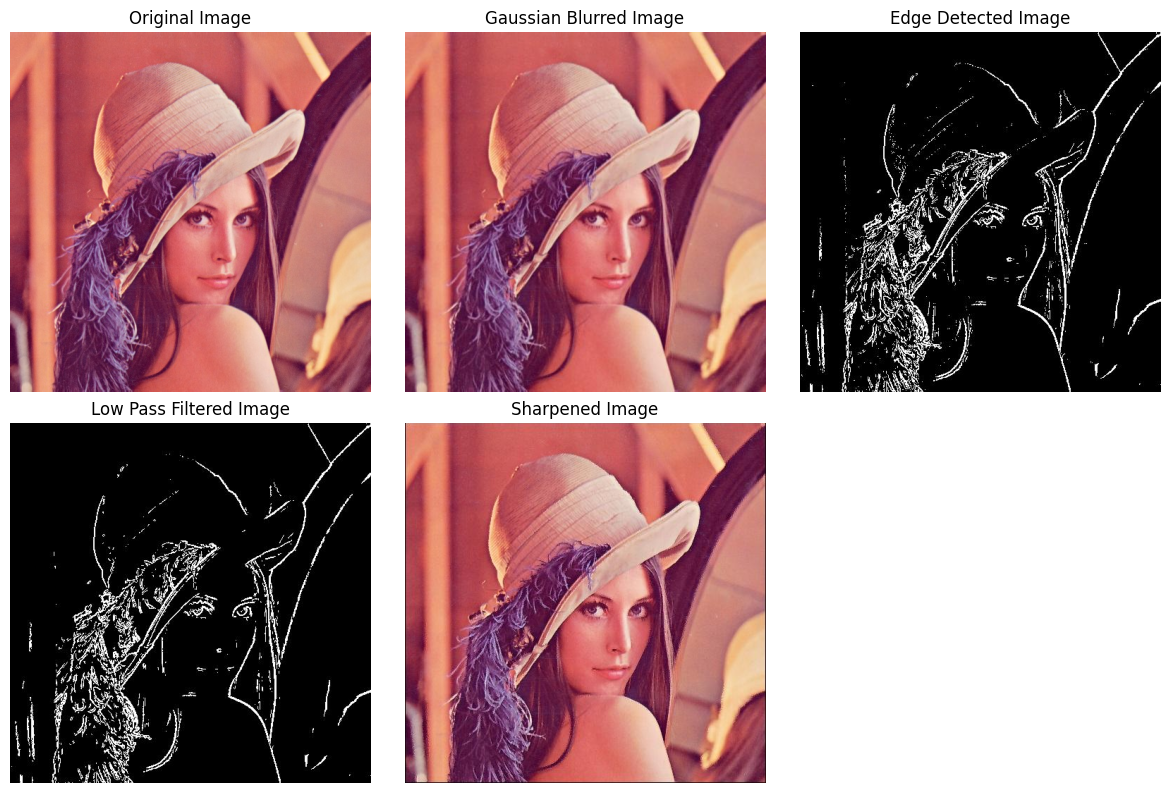

In [74]:
#Visualize the orginal image, gaussian blurred image, egde detected image, low pass filtered image, sharpened image
def visualize_images(original, blurred, edges, low_pass, sharpened):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title("Gaussian Blurred Image")
    plt.imshow(blurred)
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Edge Detected Image")
    plt.imshow(edges,cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title("Low Pass Filtered Image")
    plt.imshow(low_pass,cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title("Sharpened Image")
    plt.imshow(sharpened)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load images
original_image = Image.open(input_path)
gaussian_image = Image.open('blurred_image.jpg')
edges_image = Image.open('edges_detected.jpg')
low_pass_image = Image.open('LPF.jpg')
sharpened_image = Image.open(output_path)

visualize_images(original_image, gaussian_image, edges_image, low_pass_image, sharpened_image)


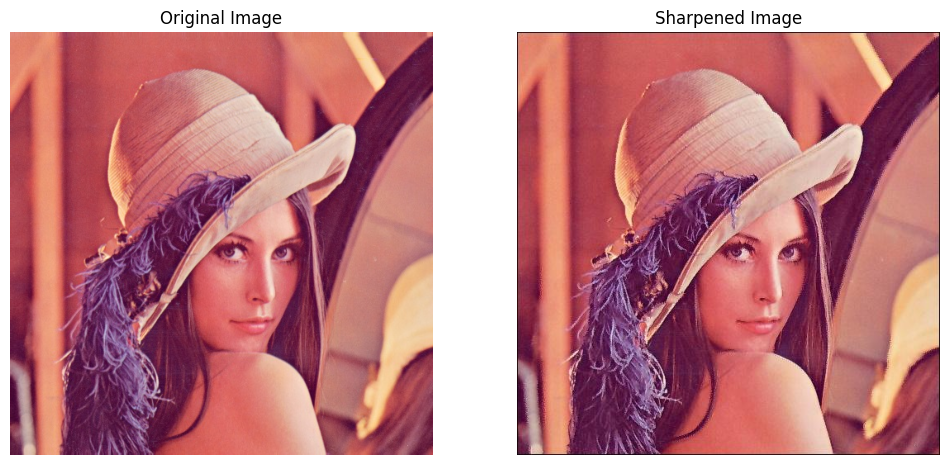

In [75]:


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image)
plt.axis('off')

plt.show()

### 10. So sánh với unsharp masking

In [76]:
original = Image.open('Lena.jpg').convert('RGB')
original_np = np.array(original)
sharpened = Image.open('sharpened_image.jpg').convert('RGB')
sharpened_np = np.array(sharpened)
diff = np.abs(original_np.astype(int) - sharpened_np.astype(int))
diff = np.clip(diff*10, 0, 255)
diff_image = Image.fromarray(np.uint8(diff))
diff_image.save('difference_image.jpg')



In [77]:


def unsharp_masking_pil(input_path, output_path, radius=2, amount=1.5):
    image = Image.open(input_path).convert('RGB')
    

    blurred = image.filter(ImageFilter.GaussianBlur(radius=radius))
    

    mask = Image.blend(image, blurred, alpha=-1)
    

    sharpened = Image.blend(image, mask, alpha=amount)
    
    sharpened.save(output_path)

unsharp_masking_pil(input_path, 'unsharp_masked_image.jpg', radius=2, amount=1.5)

unsharp_masked_image = Image.open('unsharp_masked_image.jpg')
unsharp_masked_image_np = np.array(unsharp_masked_image)
diff_unsharp = np.abs(original_np.astype(int) - unsharp_masked_image_np.astype(int))
diff_unsharp = np.clip(diff_unsharp*10, 0, 255)
diff_unsharp_image = Image.fromarray(np.uint8(diff_unsharp))
diff_unsharp_image.save('diff_unsharp_masked_image.jpg')


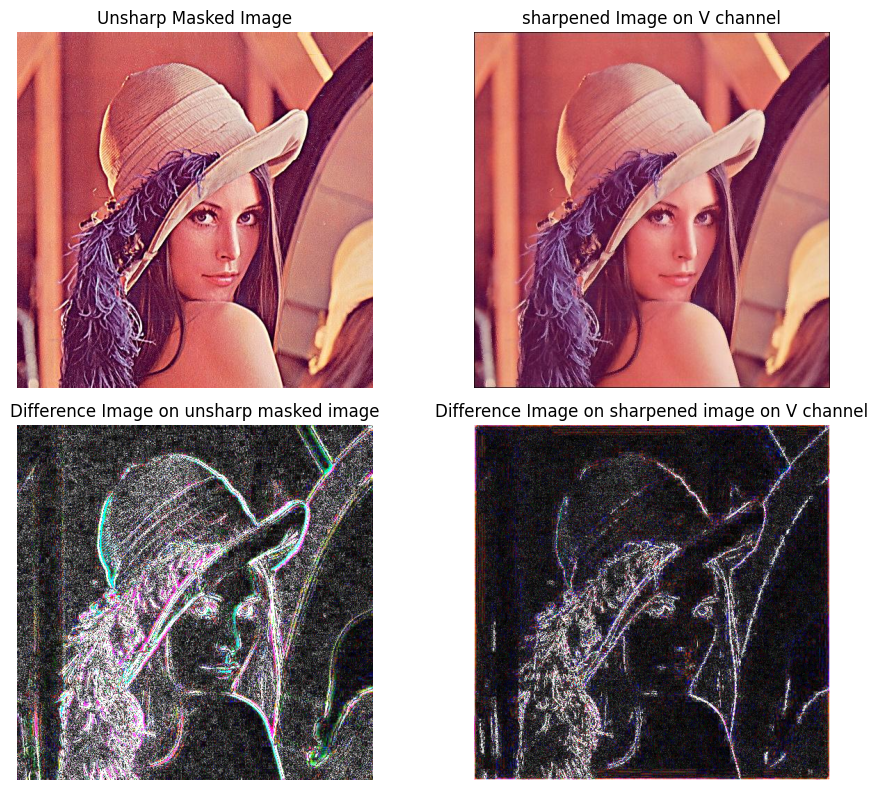

In [78]:
plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.title('Unsharp Masked Image')
plt.imshow(unsharp_masked_image)
plt.axis('off')



plt.subplot(2, 2, 2)
plt.title('sharpened Image on V channel')
plt.imshow(sharpened_image)
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Difference Image on unsharp masked image')
plt.imshow(diff_unsharp_image)
plt.axis('off')


plt.subplot(2, 2, 4)
plt.title('Difference Image on sharpened image on V channel')
plt.imshow(diff_image)
plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:


def calculate_psnr(img1, img2):
    img1 = np.array(img1).astype(np.float32)
    img2 = np.array(img2).astype(np.float32)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')  # ảnh giống nhau hoàn toàn

    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr



psnr_value = calculate_psnr(original_image, sharpened_image)
print(f"PSNR between original and sharpened image: {psnr_value:.2f} dB")
print(f"PSNR: {psnr_value:.2f} dB")

psnr_value_unsharp = calculate_psnr(original_image, unsharp_masked_image)
print(f"PSNR between original and unsharp masked image: {psnr_value_unsharp:.2f} dB")   
print(f"PSNR: {psnr_value_unsharp:.2f} dB")

PSNR between original and sharpened image: 25.75 dB
PSNR: 25.75 dB
PSNR between original and unsharp masked image: 24.65 dB
PSNR: 24.65 dB


Phương pháp được sử dụng giữ chi tiết tốt hơn do việc làm sắc nét có chọn lọc khi chỉ thay đổi các pixel ở vùng biên thay vì làm sắc nét có chọn lọc

In [80]:
from PIL import Image
import numpy as np
import cv2

def rgb_to_hsv(r, g, b):
    # Use OpenCV for RGB to HSV conversion
    rgb = np.array([[[r, g, b]]], dtype=np.uint8)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    h, s, v = hsv[0, 0]
    # Normalize to 0-1 range to match original implementation
    return h/180.0, s/255.0, v/255.0

def hsv_to_rgb(h, s, v):
    # Use OpenCV for HSV to RGB conversion
    # Convert back to OpenCV's ranges
    h_cv = int(h * 180)
    s_cv = int(s * 255)
    v_cv = int(v * 255)
    hsv = np.array([[[h_cv, s_cv, v_cv]]], dtype=np.uint8)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    r, g, b = rgb[0, 0]
    # Return in 0-1 range
    return r/255.0, g/255.0, b/255.0

def detect_edges(value_channel, threshold):
    height = len(value_channel)
    width = len(value_channel[0])
    edges = [[0] * width for _ in range(height)]
    for i in range(1, height):
        for j in range(1, width):
            if (abs(value_channel[i][j] - value_channel[i - 1][j]) > threshold or
                abs(value_channel[i][j] - value_channel[i][j - 1]) > threshold):
                edges[i][j] = 1
    return edges

def low_pass_filter(edges, neighbor_threshold):
    height = len(edges)
    width = len(edges[0])
    filtered_edges = [[edges[i][j] for j in range(width)] for i in range(height)]
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if edges[i][j] == 1:
                neighbor_count = sum([edges[i + di][j + dj] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) - 1
                if neighbor_count < neighbor_threshold:
                    filtered_edges[i][j] = 0
    return filtered_edges

def calculate_additive_magnitude(value_channel):
    flat_values = [v for row in value_channel for v in row]
    max_v = max(flat_values)
    min_v = min(flat_values)
    avg_v = sum(flat_values) / len(flat_values)
    mid_v = (max_v + min_v) / 2.0
    return (max_v / 8.0) * (avg_v/mid_v)

def sharpen_edges(hsv_image, edges, additive_magnitude, scale):
    height = len(hsv_image)
    width = len(hsv_image[0])
    new_hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            new_hsv_image[i][j] = hsv_image[i][j]
            if edges[i][j] == 1:
                local_mean = sum([hsv_image[i + di][j + dj][2] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) / 9.0
                if local_mean > hsv_image[i][j][2]:
                    delta = - scale * additive_magnitude * (hsv_image[i][j][2]/ local_mean)
                else:
                    delta = scale * additive_magnitude * (local_mean/ hsv_image[i][j][2])
                new_hsv_image[i][j][2] += delta
                new_hsv_image[i][j][2] = min(max(new_hsv_image[i][j][2], 0), 1)
    return new_hsv_image

def process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale, apply_blur=True, kernel_size=5, sigma=1.0):
    # Load image using PIL
    input_image = Image.open(input_path)
    width, height = input_image.size
    rgb_image = input_image.convert('RGB')

    # Convert to HSV (using your approach but with library functions)
    hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r, g, b)
            hsv_image[i][j] = [h, s, v]

    # Extract value channel
    value_channel = [[hsv_image[i][j][2] for j in range(width)] for i in range(height)]
    
    # Apply Gaussian blur to value channel only if requested
    if apply_blur:
        # Convert 2D value channel list to numpy array
        v_array = np.array(value_channel, dtype=np.float32)
        
        # Apply Gaussian blur using OpenCV
        if kernel_size % 2 == 0:
            kernel_size += 1  # Ensure kernel size is odd
        v_blurred_array = cv2.GaussianBlur(v_array, (kernel_size, kernel_size), sigma)
        
        # Convert back to list format
        blurred_value_channel = v_blurred_array.tolist()
        
        # Create a version of the HSV image with blurred V channel for visualization
        blurred_hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
        for i in range(height):
            for j in range(width):
                blurred_hsv_image[i][j] = [hsv_image[i][j][0], hsv_image[i][j][1], blurred_value_channel[i][j]]
        
        # Save blurred image for reference
        blurred_output = Image.new('RGB', (width, height))
        for i in range(height):
            for j in range(width):
                h, s, v = blurred_hsv_image[i][j]
                r, g, b = hsv_to_rgb(h, s, v)
                blurred_output.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))
        #blurred_output.save('blurred_v_channel.jpg')
        
        # Use the blurred value channel for edge detection
        edges = detect_edges(blurred_value_channel, edge_threshold)
    else:
        # Use the original value channel for edge detection
        edges = detect_edges(value_channel, edge_threshold)

    # Save initial edge detection
    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(edges[i][j] * 255))
    #edge_image.save('edges_detected0.jpg')

    # Apply low-pass filter to edges
    filtered_edges = low_pass_filter(edges, neighbor_threshold)

    # Save filtered edges
    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(filtered_edges[i][j] * 255))
   #edge_image.save('edges_detected.jpg')

    # Calculate magnitude for sharpening
    additive_magnitude = calculate_additive_magnitude(value_channel)
    
    # Apply edge sharpening to the original HSV image
    sharpened_hsv_image = sharpen_edges(hsv_image, filtered_edges, additive_magnitude, scale)

    # Convert back to RGB and save the output
    output_image = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            h, s, v = sharpened_hsv_image[i][j]
            r, g, b = hsv_to_rgb(h, s, v)
            output_image.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))

    output_image.save(output_path)

input_path = 'Lena.jpg'
output_path = 'sharpened_image3.jpg'
edge_threshold = 0.07
neighbor_threshold = 2
scale = 1.0

# Process with Gaussian blur on V channel only
process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale, 
              apply_blur=True, kernel_size=5, sigma=1.5)

# You can also process without blur by setting apply_blur=False
# process_image(input_path, 'sharpened_no_blur.jpg', edge_threshold, neighbor_threshold, scale, apply_blur=False)